# Import Libraries

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [137]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '2.0.3', '0.13.2', '3.7.5')

# 1. Load the data

In [138]:
df = pd.read_csv('../data/Cars.csv')

In [139]:
#check the first rows of the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [140]:
#check the columns and shpae of the data
df.columns, df.shape

(Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
        'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
        'seats'],
       dtype='object'),
 (8128, 13))

In [141]:
#statistical info
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [142]:
#check dtype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# 2. Exploratory data analysis

### Label Encoding

In [143]:
# For feature 'owner', define the mapping:  map First owner to 1, ..., Test Drive Car to 5
df["owner"] = df["owner"].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5 })
df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [144]:
# For feature 'fuel', remove all rows where 'fuel' is 'CNG' or 'LPG'
df = df[~df['fuel'].isin(['CNG','LPG'])]

In [145]:
# For feature 'mileage', remove “kmpl” and convert to float dtype
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [146]:
# For feature 'engine', remove 'CC' and convert to float
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)

In [147]:
# For feature 'max_power', remove 'bph' and convert to float
df['max_power'] = df['max_power'].str.split(' ').str[0].astype(float)

In [148]:
# For the feature 'name', take only the first word and rename it to 'brand'
df['name'] = df['name'].str.split(' ').str[0]
df = df.rename(columns={'name': 'brand'}) 

In [149]:
# Drop the feature torque
df.drop(columns = ['torque'], inplace=True)

In [150]:
# Delete all samples related to Owner == Test Drive Car which is 5
df = df[~df['owner'].isin([5])]

In [151]:
#cleaned data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Univariate analysis

#### Countplot
Since 'fuel', 'seller_type' and 'seats' features have less variations, it can be analyzed with countplot.

<Axes: xlabel='fuel', ylabel='count'>

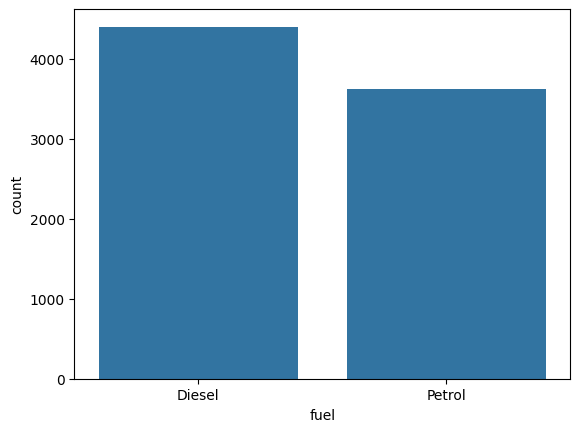

In [152]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

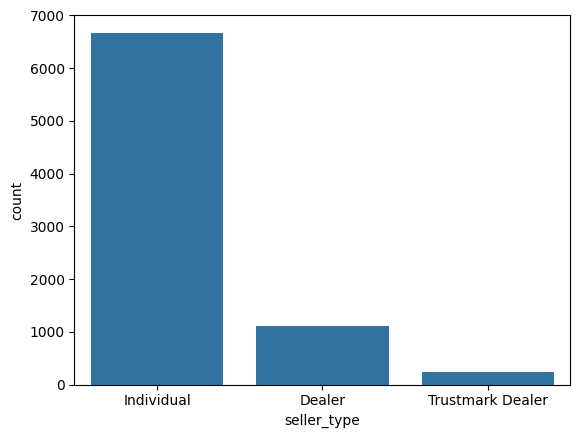

In [153]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='seats', ylabel='count'>

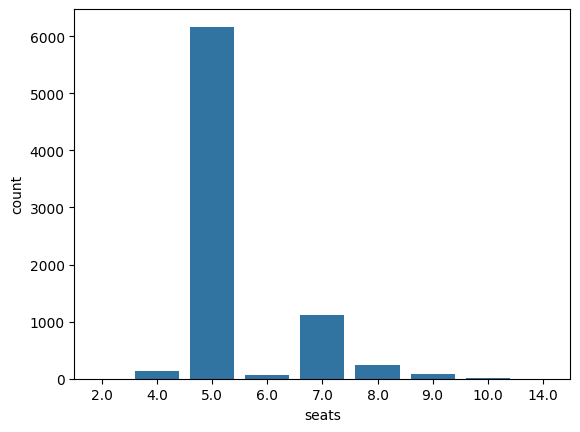

In [154]:
sns.countplot(data = df, x = 'seats')

### Distribution plot

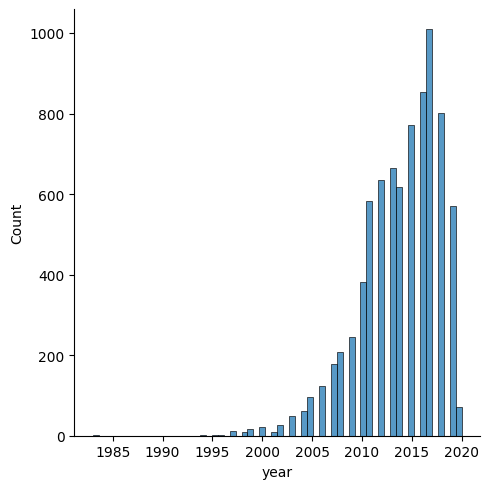

In [155]:
sns.displot(data = df, x = 'year')

### Multivariate analysis

#### Boxplot
Boxplot is used to analyze outliers.

Text(0.5, 0, 'Fuel')

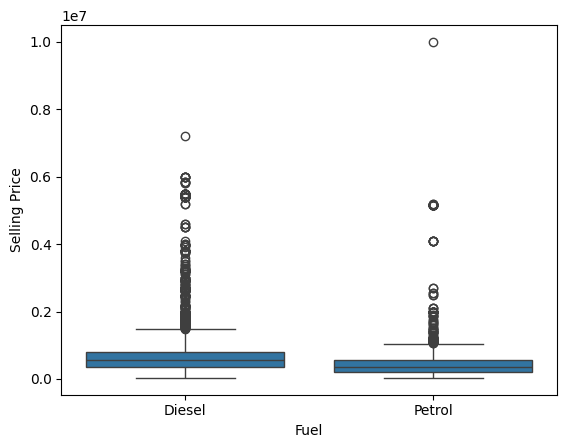

In [156]:
sns.boxplot(x = df['fuel'], y = df['selling_price'])
plt.ylabel("Selling Price")
plt.xlabel("Fuel")

Text(0.5, 0, 'Seller Type')

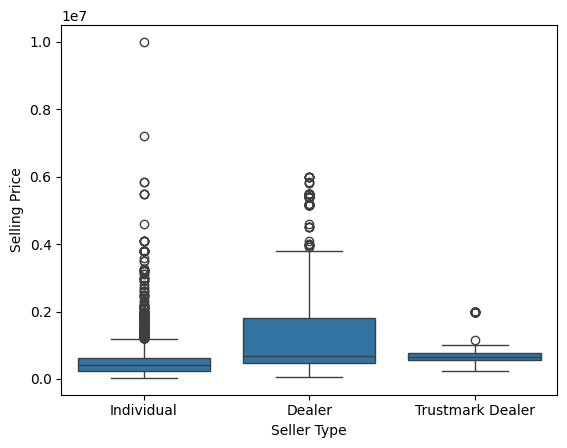

In [157]:
sns.boxplot(x = df['seller_type'], y = df['selling_price'])
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

### Correlation matrix

To see the correlation between the features, all features should be in numeric data type. Therefore, the object type features are changed to numeric using label encoding. In this case, the brand of the car can affect the selling price. That's why it is label-encoded to see the correlation.

In [158]:
# label encoding method is used to convert the columns to numeric
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

In [159]:
# check to see what numbers are mapped to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [160]:
# save the names and get the mapping of the classes
brand_mapping = dict(zip(le.classes_, range(len(le.classes_))))
brand_mapping

{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Chevrolet': 4,
 'Daewoo': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Lexus': 17,
 'MG': 18,
 'Mahindra': 19,
 'Maruti': 20,
 'Mercedes-Benz': 21,
 'Mitsubishi': 22,
 'Nissan': 23,
 'Opel': 24,
 'Peugeot': 25,
 'Renault': 26,
 'Skoda': 27,
 'Tata': 28,
 'Toyota': 29,
 'Volkswagen': 30,
 'Volvo': 31}

In [161]:
df['fuel'] = le.fit_transform(df['fuel'])
df['fuel'].unique()

array([0, 1])

In [162]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [163]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [164]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [165]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

In [166]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [167]:
# Apply log transformation to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

In [168]:
#check dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 947.9 KB


<Axes: >

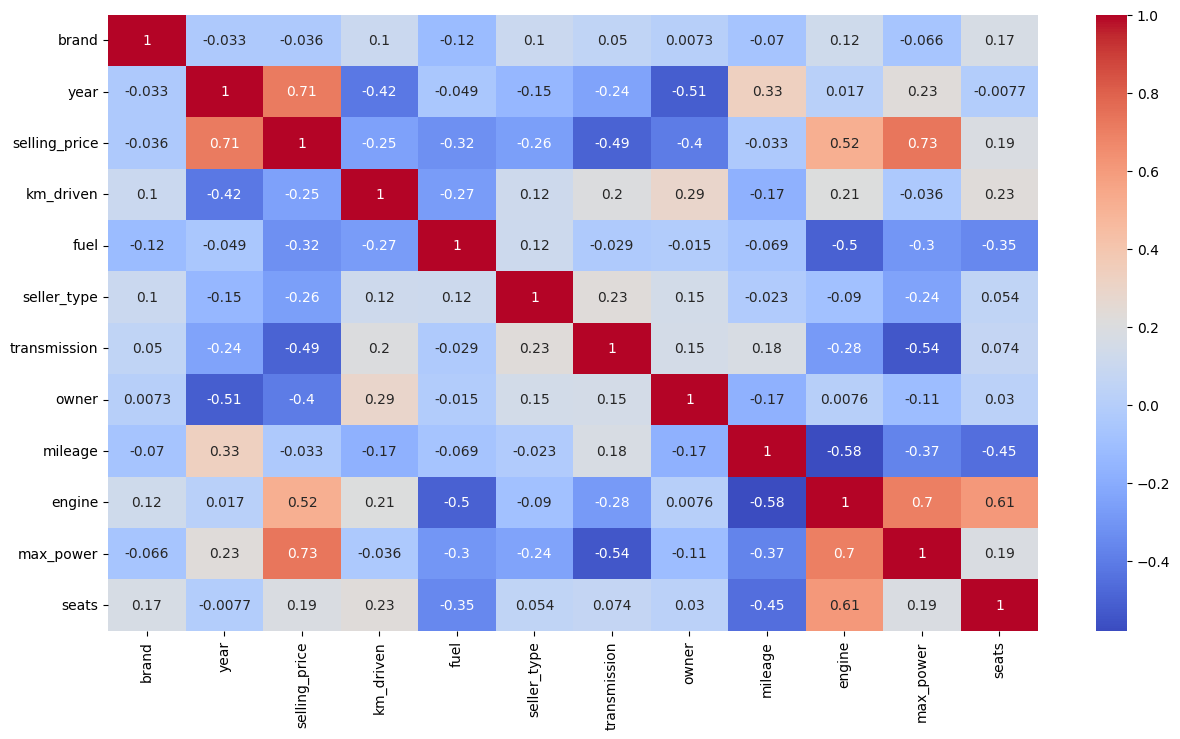

In [169]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") 

Regarding the heatmap, it can be concluded that the selling price of the cars are highly correlated to the years, max_power and engine of the cars. These features will have an impact on the selling_price of the cars. By interpreting this heatmap, it can be helpful to decide which features to chooes for building the model. 

# 3. Feature engineering

This step is skipped. No new feature is created.

# 4. Feature selection

Three features chosen for selling_price prediction are 'year', 'mileage', and 'max_power' because the selling price can be affected by these features: the years the car fabricated, how much kilometers per liter of fuel the car can drive, and the highest power output of the car.

In [170]:
#X is the features used to predict cars' selling price 
X = df[   ['year', 'mileage', 'max_power']   ]

#y is the cars' selling price
y = df['selling_price']

### Train and split

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [172]:
X_train.shape ,  X_test.shape

((6422, 3), (1606, 3))

In [173]:
y_train.shape , y_test.shape

((6422,), (1606,))

# 5. Preprocessing

In [174]:
#check for null values
X_train.isna().sum()

year           0
mileage      171
max_power    165
dtype: int64

In [175]:
y_train.isna().sum()

0

In [176]:
X_test.isna().sum()

year          0
mileage      43
max_power    43
dtype: int64

In [177]:
y_test.isna().sum()

0

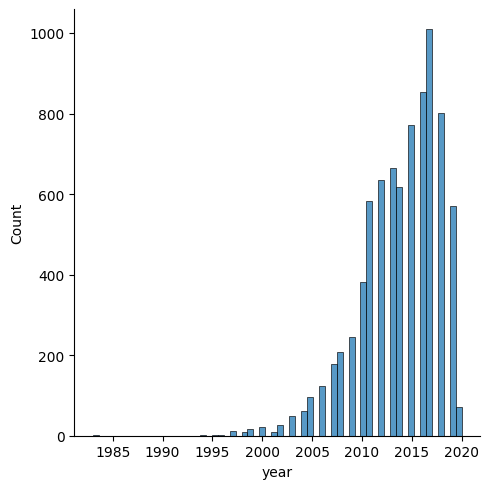

In [178]:
sns.displot( data = df, x = 'year' )

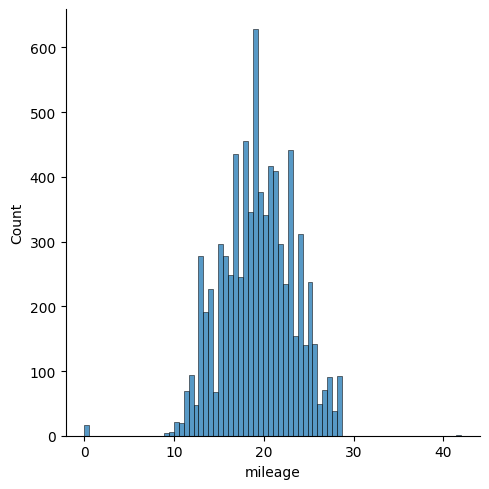

In [179]:
sns.displot( data = df, x = 'mileage' )

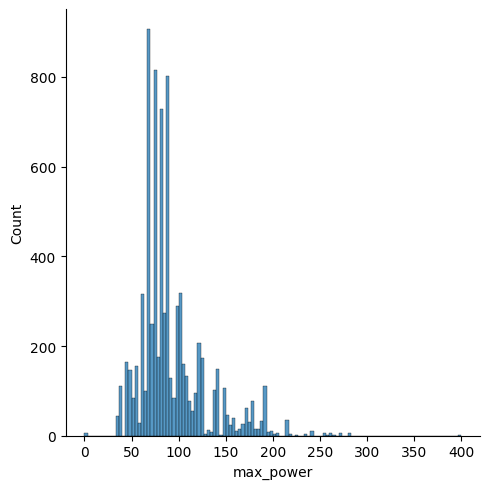

In [180]:
sns.displot( data = df, x = 'max_power' )

In [181]:
#let's fill the training set first
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [182]:
#let's fill the testing set with the training distribution
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [183]:
#check again
X_train.isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [184]:
X_test.isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [185]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking outliers

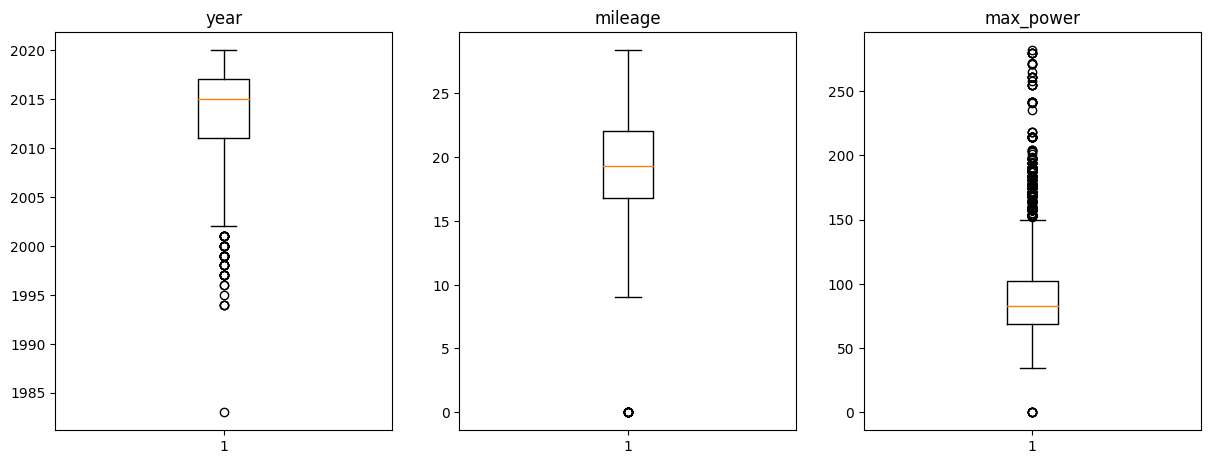

In [186]:
# Create a dictionary of columns.
col_dict = {'year':1, 'mileage':2, 'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [187]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [188]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


In [189]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


# 6. Modeling 

In [190]:
from sklearn.linear_model import LinearRegression  #using regression model
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.1085660211799154
r2:  0.8475499065024805


### Cross Validation + Grid Search

In [191]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [192]:
from sklearn.model_selection import KFold, cross_val_score

# Define lists to store mse
train_mse = []
test_mse = []

# Define the number of splits
kfold = KFold(n_splits = 5, shuffle = True)
for i,model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    print(f"{algorithm_names[i]}: Score: {scores} ; Mean: {scores.mean()}")

Linear Regression: Score: [-0.11152923 -0.11531984 -0.12768535 -0.13410912 -0.10587578] ; Mean: -0.1189038620202297
SVR: Score: [-0.3205993  -0.30112736 -0.32177897 -0.34486093 -0.3159075 ] ; Mean: -0.3208548125480172
KNeighbors Regressor: Score: [-0.0688191  -0.05998484 -0.05704995 -0.065227   -0.07211446] ; Mean: -0.0646390698651498
Decision-Tree Regressor: Score: [-0.05879356 -0.07632016 -0.06596243 -0.07447806 -0.06400219] ; Mean: -0.06791127848396913
Random-Forest Regressor: Score: [-0.05781919 -0.0465645  -0.04938572 -0.05763878 -0.06036065] ; Mean: -0.054353766742380516


### Grid search

In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [194]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [195]:
# Find the grid_search's best score
best_mse = grid.best_score_

In [196]:
# Print the best mse score
best_mse

-0.05714234906231445

# 7. Testing

In [197]:
from sklearn.metrics import mean_squared_error
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.04805324779585679

# 8. Analysis

In [198]:
# Find the feature importance by Algorithm way
rf = grid.best_estimator_

# print(rf)
rf.feature_importances_

array([0.46627399, 0.05450516, 0.47922085])

<BarContainer object of 3 artists>

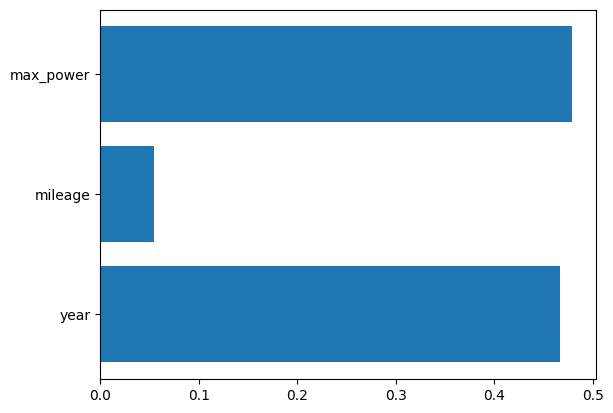

In [199]:
plt.barh(X.columns, rf.feature_importances_)

### Permutation way 

Text(0.5, 0, 'Random Forest Feature Importance')

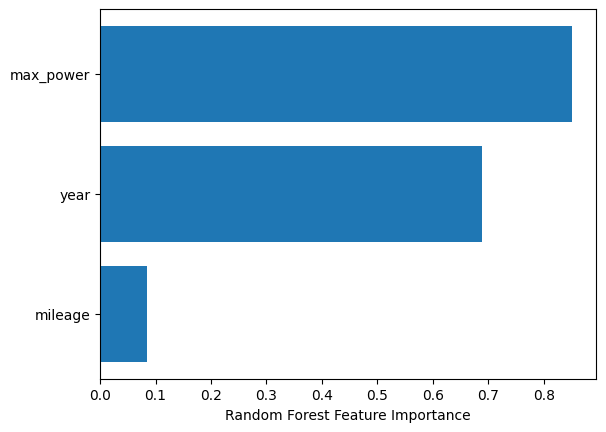

In [200]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Let's plot
sorted_index = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_index], perm_importance.importances_mean[sorted_index])
plt.xlabel("Random Forest Feature Importance")

## Shap way

In [201]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

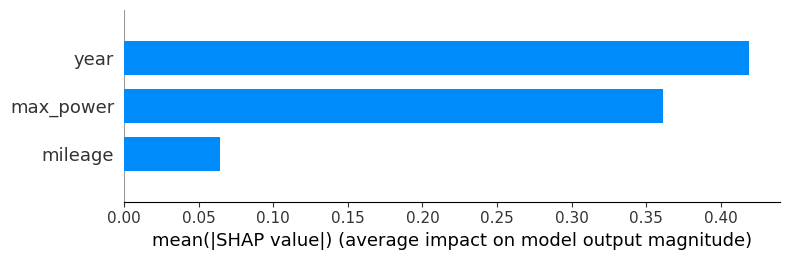

In [202]:
# Plot Shap
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# 9. Inference

In [203]:
import pickle

# save the model to disk
filename = './model/car_selling_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [204]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [205]:
print(type(loaded_model))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [206]:
#Test the model with sample input
df[['year', 'mileage','max_power','selling_price']].loc[10]

year             2014.000000
mileage            19.010000
max_power         108.450000
selling_price      13.122363
Name: 10, dtype: float64

In [207]:
#real selling price of the sample
np.exp(df['selling_price'].loc[10])

499999.9999999997

In [208]:
#['engine', 'mileage','max_power']
sample = np.array([[2014, 19.01, 108.45]])

In [209]:
# Predict the selling price and taking exponent to show the car selling price
predicted_price = loaded_model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([488607.27788043])

# Car selling price prediction analysis and report

According to the correleation matrix, 'year', 'engine' and 'max_power' features significantly impact the prediction. However, feature like 'brand' has negative correlation to the selling price. In real world, the brand means a lot. Based on the brand, the price can be double or triple. 

To analyze, the brand is important to predict the selling price. Likewise, the year fabricated also important because it tells whether the model of the car is latest or not. Also, people mostly consider mileage (km/l). The more mileage, the more they codsider to buy. Finally, max_power is one of the most important features as the car's maximun output power is crucial for the customers.

For this task, I choose these three features:
1. year
2. mileage
3. max_power

From the results, Random Forest Regressor performed the best in predicting selling price because it is an ensemble method that combines multiple decision trees to capture complex relationships in the data. It handles non-linear patterns effectively, reduces overfitting through averaging, and is robust to missing data and outliers. 

On the other hand, Support Vector Regressor (SVR) performed the worst because it struggles with large datasets due to its quadratic complexity. Additionally, SVR is sensitive to hyperparameters like the kernel type and regularization, which might not align well with the dataset's structure.